<a href="https://colab.research.google.com/github/rajpratik8484/Capstone_Project/blob/main/Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install seaborn==0.9.0

     |████████████████████████████████| 215kB 5.7MB/s 
  Found existing installation: seaborn 0.11.1
    Uninstalling seaborn-0.11.1:
      Successfully uninstalled seaborn-0.11.1


In [ ]:
import pandas as pd
from pandas import DataFrame
import numpy as np

import seaborn as sns

from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
from sklearn import datasets, linear_model
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error 

import matplotlib.dates as mdates
import matplotlib.pyplot as plt

from datetime import datetime, timedelta

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm

from scipy import stats

from itertools import product

from math import sqrt
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# DATA REPRESENTATION

In [ ]:
file_name = r"bitcoin_cash_price.csv"

In [ ]:
color = sns.color_palette()
df = pd.read_csv(file_name,parse_dates=['Date'])
df = df.iloc[::-1]
df['Date_mpl'] = df['Date'].apply(lambda x: mdates.date2num(x))

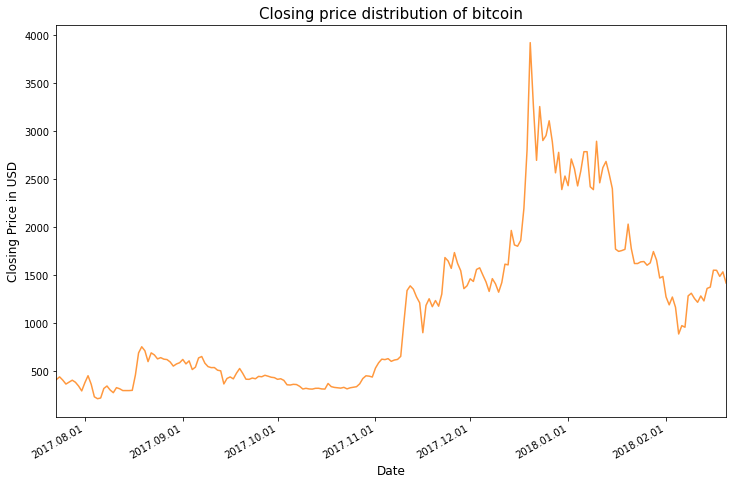

In [ ]:
#closing price
fig, ax = plt.subplots(figsize=(12,8))
sns.tsplot(df.Close.values, time=df.Date_mpl.values, alpha=0.8, color=color[1], ax=ax)
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))
fig.autofmt_xdate()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Closing Price in USD', fontsize=12)
plt.title("Closing price distribution of bitcoin", fontsize=15)
plt.show()

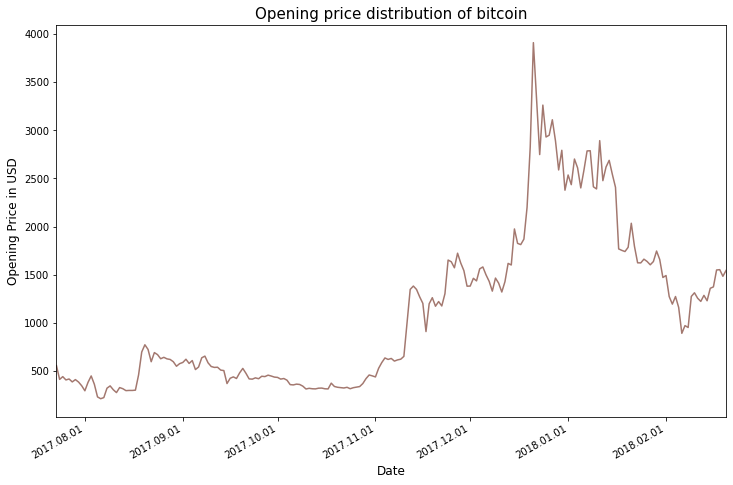

In [ ]:
#opening price
fig, ax = plt.subplots(figsize=(12,8))
sns.tsplot(df.Open.values, time=df.Date_mpl.values, alpha=0.8, color=color[5], ax=ax)
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))
fig.autofmt_xdate()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Opening Price in USD', fontsize=12)
plt.title("Opening price distribution of bitcoin", fontsize=15)
plt.show()

# LINEAR REGRESSION

In [ ]:
df = pd.read_csv(r"bitcoin_cash_price.csv")
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Feb 20, 2018",1543.27,1569.03,1414.35,1418.73,"820,947,000","26,199,800,000"
1,"Feb 19, 2018",1483.34,1553.81,1483.34,1534.77,"578,906,000","25,179,700,000"
2,"Feb 18, 2018",1552.10,1641.40,1428.49,1487.46,"907,873,000","26,344,200,000"
3,"Feb 17, 2018",1548.48,1568.64,1517.14,1551.39,"641,719,000","26,280,100,000"
4,"Feb 16, 2018",1373.16,1558.66,1369.68,1552.20,"961,010,000","23,302,000,000"


In [ ]:
df = df.iloc[::-1]

In [ ]:
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
212,"Jul 23, 2017",555.89,578.97,411.78,413.06,"85,013",-
211,"Jul 24, 2017",412.58,578.89,409.21,440.70,"190,952",-
210,"Jul 25, 2017",441.35,541.66,338.09,406.90,"524,908",-
209,"Jul 26, 2017",407.08,486.16,321.79,365.82,"1,784,640",-
208,"Jul 27, 2017",417.10,460.97,367.78,385.48,"533,207",-


In [ ]:
y = df["Close"]
y = y.values.reshape(-1, 1)
y

array([[ 413.06],
       [ 440.7 ],
       [ 406.9 ],
       [ 365.82],
       [ 385.48],
       [ 406.05],
       [ 384.77],
       [ 345.66],
       [ 294.46],
       [ 380.01],
       [ 452.66],
       [ 364.05],
       [ 233.05],
       [ 213.15],
       [ 220.66],
       [ 319.69],
       [ 345.49],
       [ 303.89],
       [ 275.95],
       [ 328.24],
       [ 317.09],
       [ 298.05],
       [ 297.68],
       [ 297.86],
       [ 300.21],
       [ 460.53],
       [ 690.24],
       [ 754.56],
       [ 712.87],
       [ 599.63],
       [ 690.88],
       [ 669.4 ],
       [ 628.11],
       [ 641.05],
       [ 625.32],
       [ 620.9 ],
       [ 596.18],
       [ 552.93],
       [ 575.21],
       [ 588.17],
       [ 622.17],
       [ 575.9 ],
       [ 607.43],
       [ 517.24],
       [ 541.71],
       [ 638.18],
       [ 652.86],
       [ 583.1 ],
       [ 547.47],
       [ 537.07],
       [ 537.81],
       [ 510.41],
       [ 503.61],
       [ 367.04],
       [ 424.02],
       [ 4

In [ ]:
x = df["Open"]
x = x.values.reshape(-1, 1)
x

array([[ 555.89],
       [ 412.58],
       [ 441.35],
       [ 407.08],
       [ 417.1 ],
       [ 386.65],
       [ 410.56],
       [ 385.14],
       [ 346.36],
       [ 294.6 ],
       [ 382.38],
       [ 448.49],
       [ 362.18],
       [ 231.11],
       [ 212.18],
       [ 223.76],
       [ 321.35],
       [ 345.28],
       [ 305.21],
       [ 275.88],
       [ 327.82],
       [ 316.29],
       [ 296.1 ],
       [ 298.19],
       [ 297.97],
       [ 301.02],
       [ 458.67],
       [ 697.04],
       [ 772.42],
       [ 723.7 ],
       [ 596.19],
       [ 690.96],
       [ 670.03],
       [ 627.06],
       [ 641.88],
       [ 625.89],
       [ 619.7 ],
       [ 596.13],
       [ 549.32],
       [ 576.25],
       [ 588.4 ],
       [ 621.96],
       [ 578.27],
       [ 608.26],
       [ 514.9 ],
       [ 541.28],
       [ 636.85],
       [ 654.37],
       [ 584.73],
       [ 546.48],
       [ 537.19],
       [ 539.03],
       [ 509.47],
       [ 504.22],
       [ 369.49],
       [ 4

In [ ]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(170, 1) (170, 1)
(43, 1) (43, 1)


In [ ]:
X_train

array([[ 422.09],
       [ 321.35],
       [ 231.11],
       [ 539.03],
       [2891.55],
       [1571.39],
       [1637.19],
       [ 541.28],
       [ 297.97],
       [ 322.42],
       [ 456.71],
       [2475.9 ],
       [1784.26],
       [ 527.68],
       [2412.36],
       [2947.74],
       [ 330.67],
       [ 360.09],
       [1159.89],
       [2390.02],
       [3108.32],
       [ 619.7 ],
       [1869.21],
       [2687.1 ],
       [1175.06],
       [1634.  ],
       [ 625.89],
       [1543.27],
       [1202.17],
       [ 578.27],
       [1483.34],
       [1194.23],
       [1381.81],
       [ 338.3 ],
       [1255.59],
       [1346.97],
       [ 404.2 ],
       [ 449.37],
       [1498.49],
       [1974.66],
       [1740.17],
       [ 382.38],
       [1580.16],
       [ 345.28],
       [ 697.04],
       [ 971.08],
       [ 441.86],
       [1636.41],
       [1222.43],
       [1752.27],
       [ 654.37],
       [ 330.9 ],
       [1273.87],
       [2825.03],
       [ 635.35],
       [ 3

In [ ]:
y_train

array([[ 479.32],
       [ 345.49],
       [ 213.15],
       [ 510.41],
       [2462.61],
       [1735.66],
       [1603.9 ],
       [ 638.18],
       [ 300.21],
       [ 314.95],
       [ 447.81],
       [2620.99],
       [2032.12],
       [ 587.22],
       [2391.56],
       [3108.89],
       [ 315.6 ],
       [ 342.21],
       [ 887.41],
       [2895.38],
       [2889.52],
       [ 596.18],
       [2196.64],
       [2553.32],
       [1303.31],
       [1571.27],
       [ 620.9 ],
       [1418.73],
       [ 900.78],
       [ 607.43],
       [1534.77],
       [1272.5 ],
       [1462.68],
       [ 367.57],
       [1217.64],
       [1388.86],
       [ 358.45],
       [ 439.05],
       [1430.1 ],
       [1815.43],
       [1769.62],
       [ 452.66],
       [1501.85],
       [ 303.89],
       [ 754.56],
       [ 957.96],
       [ 457.31],
       [1746.25],
       [1283.91],
       [1756.75],
       [ 583.1 ],
       [ 327.44],
       [1312.11],
       [3923.07],
       [ 620.45],
       [ 3

In [ ]:
X_test

array([[ 346.36],
       [ 670.03],
       [ 355.44],
       [1552.1 ],
       [ 475.83],
       [ 419.65],
       [ 305.21],
       [1272.5 ],
       [ 315.9 ],
       [ 627.06],
       [ 588.4 ],
       [ 415.87],
       [ 410.56],
       [1260.95],
       [1651.86],
       [ 339.27],
       [ 327.82],
       [ 504.22],
       [1329.16],
       [ 417.92],
       [ 362.18],
       [1427.38],
       [1767.58],
       [1464.63],
       [ 313.22],
       [ 313.7 ],
       [ 448.49],
       [1001.64],
       [ 596.19],
       [ 596.13],
       [ 549.32],
       [3260.55],
       [ 320.2 ],
       [1623.14],
       [1491.12],
       [ 315.26],
       [1273.17],
       [1411.84],
       [2541.58],
       [2786.6 ],
       [ 315.47],
       [1302.23],
       [1470.74]])

In [ ]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [ ]:
predictions[0:5]

array([[ 369.27209098],
       [ 687.35864274],
       [ 378.19545703],
       [1554.21255169],
       [ 496.50867719]])

Text(0, 0.5, 'Predictions')

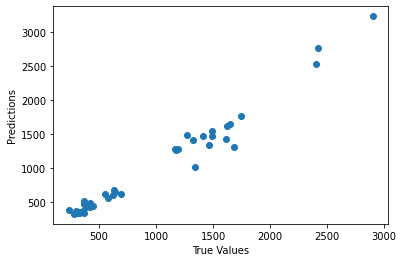

In [ ]:
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [ ]:
print("Score:", model.score(X_test, y_test))

Score: 0.9630074660520132


In [ ]:
# Perform 6-fold cross validation
scores = cross_val_score(model, x, y, cv=6)
print('Cross-validated scores:', scores)

Cross-validated scores: [0.75556888 0.51513303 0.88979746 0.64317579 0.39890808 0.76145938]


Text(0, 0.5, 'Predictions')

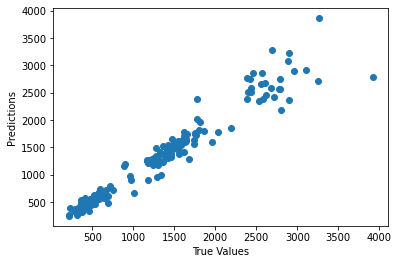

In [ ]:
# Make cross validated predictions
predictions = cross_val_predict(model, x, y, cv=6)
plt.scatter(y, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [ ]:
accuracy = metrics.r2_score(y, predictions)
print('Cross-Predicted Accuracy:', accuracy)

Cross-Predicted Accuracy: 0.9555607839331259


# SUPPORT VECTOR REGRESSION

In [ ]:
model = SVC(gamma='auto')
svmmodel=svm.SVR(kernel='poly', C=1, degree=1)
model = svmmodel.fit(X_train, y_train.ravel())
predictions = svmmodel.predict(X_test)

In [ ]:
predictions[0:5]

array([723.45376642, 777.68441989, 724.97511327, 925.47455338,
       745.14636291])

Text(0, 0.5, 'Predictions')

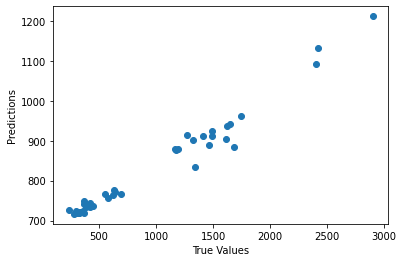

In [ ]:
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [ ]:
print("Score:", model.score(X_test, y_test))

Score: 0.296543353460345


In [ ]:
# Perform 6-fold cross validation
scores = cross_val_score(model, x, y, cv=6)
print('Cross-validated scores:', scores)

Cross-validated scores: [-18.20395698 -66.5253815  -42.43766683  -6.2942874   -8.71745244
  -7.83899236]


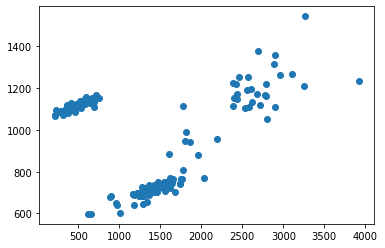

In [ ]:
# Make cross validated predictions
predictions = cross_val_predict(model, x, y, cv=6)
plt.scatter(y, predictions)

In [ ]:
accuracy = metrics.r2_score(y, predictions)
print('Cross-Predicted Accuracy:', accuracy)

Cross-Predicted Accuracy: -0.12599326719525128


# ARIMA

In [ ]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

colors = ["windows blue", "amber", "faded green", "dusty purple"]
sns.set(rc={"figure.figsize": (20,10), "axes.titlesize" : 18, "axes.labelsize" : 12, 
            "xtick.labelsize" : 14, "ytick.labelsize" : 14 })

In [ ]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%b %d, %Y')
df = pd.read_csv(r'bitcoin_price.csv', parse_dates=['Date'], index_col='Date', date_parser=dateparse)
df = df.iloc[::-1]
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]


In [ ]:
df.head()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"


In [ ]:
btc=df
# Drop some columns
btc.drop(['Volume', 'Market Cap'],axis=1,inplace=True) 

In [ ]:
# Resampling to monthly frequency
btc_month = btc.resample('M').mean()

Dickey–Fuller test: p=0.998816


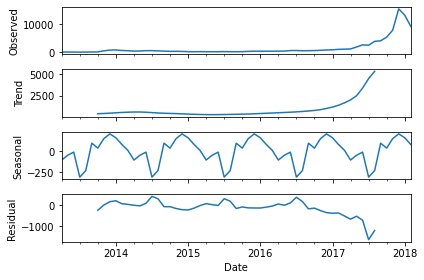

In [ ]:
#seasonal_decompose(btc_month.close, freq=12).plot()
seasonal_decompose(btc_month.Close, model='additive').plot()
print("Dickey–Fuller test: p=%f" % adfuller(btc_month.Close)[1])

### timeseries is not stationary with 99.88% confidence

In [ ]:
btc_month['close_box'], lmbda = stats.boxcox(btc_month.Close)
print("Dickey–Fuller test: p=%f" % adfuller(btc_month.close_box)[1])

Dickey–Fuller test: p=0.511886


### The p-value indicates that series is still not stationary.

In [ ]:
#seasonal differencing involves computing the difference between an observation and the 
#corresponding observation in the previous year.

In [ ]:
# Seasonal differentiation (12 months)
btc_month['box_diff_seasonal_12'] = btc_month.close_box - btc_month.close_box.shift(12)
print("Dickey–Fuller test: p=%f" % adfuller(btc_month.box_diff_seasonal_12[12:])[1])

Dickey–Fuller test: p=0.665690


### The p-value indicates that series is still not stationary.

In [ ]:
# Seasonal differentiation (3 months)
btc_month['box_diff_seasonal_3'] = btc_month.close_box - btc_month.close_box.shift(3)
print("Dickey–Fuller test: p=%f" % adfuller(btc_month.box_diff_seasonal_3[3:])[1])

Dickey–Fuller test: p=0.017885


### The p-value indicates that series is stationary as the computed p-value is lower than the significance level alpha = 0.05.

In [ ]:
#Sometimes it may be necessary to difference the data a second time to obtain a stationary time series, 
#which is referred to as second order differencing.

Dickey–Fuller test: p=0.002307


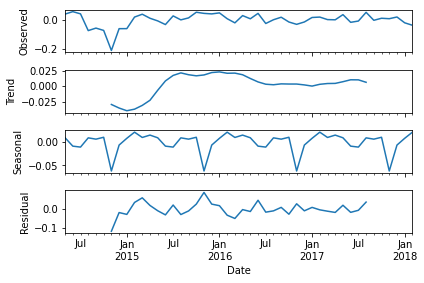

In [ ]:
# Regular differentiation
btc_month['box_diff2'] = btc_month.box_diff_seasonal_12 - btc_month.box_diff_seasonal_12.shift(1)

# STL-decomposition
seasonal_decompose(btc_month.box_diff2[13:]).plot()   
print("Dickey–Fuller test: p=%f" % adfuller(btc_month.box_diff2[13:])[1])

### The p-value indicates that series is stationary as the computed p-value is lower than the significance level alpha = 0.05.

In [ ]:
#Autocorrelation is the correlation of a time series with the same time series lagged. 
#It summarizes the strength of a relationship with an observation in a time series with observations at prior time steps.

#We create autocorrelation factor (ACF) and partial autocorrelation factor (PACF) plots to identify patterns 
#in the above data which is stationary on both mean and variance. The idea is to identify presence of AR and MA 
#components in the residuals.

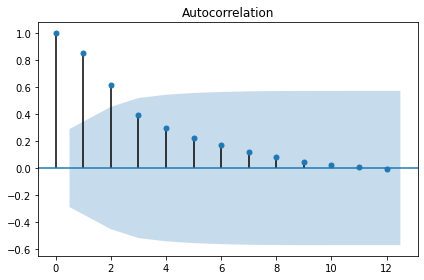

In [ ]:
#autocorrelation_plot(btc_month.close)
plot_acf(btc_month.Close[13:].values.squeeze(), lags=12)
plt.tight_layout()

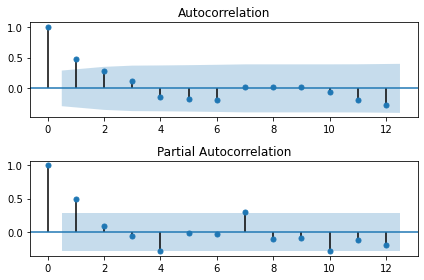

In [ ]:
# Initial approximation of parameters using Autocorrelation and Partial Autocorrelation Plots
ax = plt.subplot(211)
# Plot the autocorrelation function
#sm.graphics.tsa.plot_acf(btc_month.box_diff2[13:].values.squeeze(), lags=48, ax=ax)
plot_acf(btc_month.box_diff2[13:].values.squeeze(), lags=12, ax=ax)
ax = plt.subplot(212)
#sm.graphics.tsa.plot_pacf(btc_month.box_diff2[13:].values.squeeze(), lags=48, ax=ax)
plot_pacf(btc_month.box_diff2[13:].values.squeeze(), lags=12, ax=ax)
plt.tight_layout()

### Monthly Forecasting 
#### ARIMA Model 

In [ ]:
#p - the number of lag observations to include in the model, or lag order. (AR)
#d - the number of times that the raw observations are differenced, or the degree of differencing. (I)
#q - the size of the moving average window, also called the order of moving average.(MA)

#A linear regression model is constructed including the specified number and type of terms, 
#and the data is prepared by a degree of differencing in order to make it stationary, 
#i.e. to remove trend and seasonal structures that negatively affect the regression model. 
#A value of 0 for a parameter indicates to not use that element of the model.

#### Parameter selection using AIC (Akaike Information Criterion) value 

In [ ]:
#A model that fits the data very well while using lots of features will be assigned a larger AIC 
#score than a model that uses fewer features to achieve the same goodness-of-fit. 
#Therefore, we are interested in finding the model that yields the lowest AIC value.

In [ ]:
# Initial approximation of parameters
qs = range(0, 3)
ps = range(0, 3)
d=1
parameters = product(ps, qs)
parameters_list = list(parameters)
len(parameters_list)

# Model Selection
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')
for param in parameters_list:
    try:
        model = SARIMAX(btc_month.close_box, order=(param[0], d, param[1])).fit(disp=-1)
    except ValueError:
        print('bad parameter combination:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

In [ ]:
# Best Models
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())

  parameters         aic
3     (1, 0) -221.089072
1     (0, 1) -220.707887
4     (1, 1) -219.129637
6     (2, 0) -219.119956
2     (0, 2) -218.906347


In [ ]:
print(best_model.summary())

                           Statespace Model Results                           
Dep. Variable:              close_box   No. Observations:                   59
Model:               SARIMAX(1, 1, 0)   Log Likelihood                 112.545
Date:                Sat, 17 Apr 2021   AIC                           -221.089
Time:                        17:26:02   BIC                           -216.968
Sample:                    04-30-2013   HQIC                          -219.484
                         - 02-28-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3738      0.151      2.471      0.013       0.077       0.670
sigma2         0.0012      0.000     11.241      0.000       0.001       0.001
Ljung-Box (Q):                       19.66   Jarque-

### Analysis of results 

In [ ]:
#The coef column shows the weight (i.e. importance) of each feature and how each one impacts the time series. 
#The P>|z| column informs us of the significance of each feature weight. 
#Here, each weight has a p-value lower or close to 0.05, so it is reasonable to retain all of them in our model.

In [ ]:
print("Dickey–Fuller test:: p=%f" % adfuller(best_model.resid[13:])[1])

Dickey–Fuller test:: p=0.005727


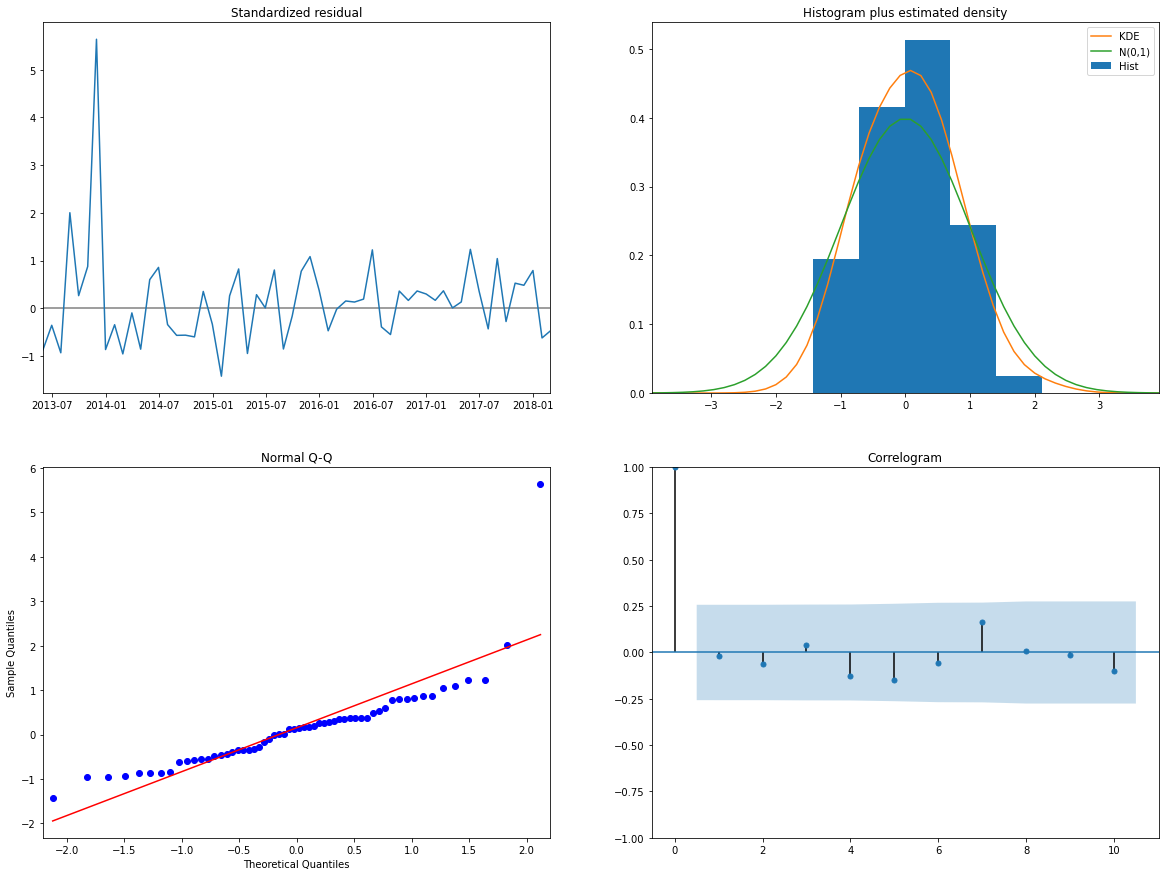

In [ ]:
best_model.plot_diagnostics(figsize=(20, 15))
plt.show()

In [ ]:
#In the histogram (top right), the KDE line should follow the N(0,1) 
#line (normal distribution with mean 0, standard deviation 1) closely. 
#This is an indication whether the residuals are normally distributed or not.

#In the Q-Q-plot the ordered distribution of residuals (blue dots) should follow the linear trend of the samples 
#taken from a standard normal distribution with N(0, 1). 
#Again, this is an indication whether the residuals are normally distributed.

#The standardized residual plot doesn't display any obvious seasonality. 
#This is confirmed by the autocorrelation plot, which shows that the time series residuals 
#have low correlation with lagged versions of itself.

### Prediction

In [ ]:
# Inverse Box-Cox Transformation Function
def invboxcox(y,lmbda):
   if lmbda == 0:
      return(np.exp(y))
   else:
      return(np.exp(np.log(lmbda*y+1)/lmbda))

Text(0, 0.5, 'USD')

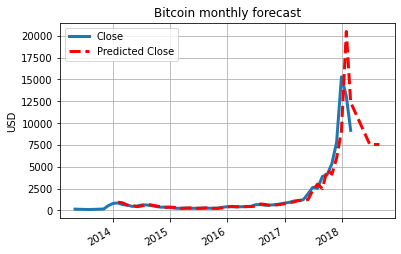

In [ ]:
btc_month_pred = btc_month[['Close']]
date_list = [datetime(2018, 6, 30), datetime(2018, 7, 31), datetime(2018, 8, 31)]
future = pd.DataFrame(index=date_list, columns= btc_month.columns)
btc_month_pred = pd.concat([btc_month_pred, future])

#btc_month_pred['forecast'] = invboxcox(best_model.predict(start=0, end=75), lmbda)
btc_month_pred['forecast'] = invboxcox(best_model.predict(start=datetime(2014, 1, 31), end=datetime(2018, 8, 31)), lmbda)

btc_month_pred.Close.plot(linewidth=3)
btc_month_pred.forecast.plot(color='r', ls='--', label='Predicted Close', linewidth=3)
plt.legend()
plt.grid()
plt.title('Bitcoin monthly forecast')
plt.ylabel('USD')

### SARIMAX Model
### Seasonal AutoRegressive Integrated Moving Average with eXogenous regressors model

#### Parameter Selection

In [ ]:
Qs = range(0, 2)
qs = range(0, 3)
Ps = range(0, 3)
ps = range(0, 3)
D=1
d=1
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

# Model Selection
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')
for param in parameters_list:
    try:
#        model = SARIMAX(btc_month.close_box, order=(param[0], d, param[1]), seasonal_order=(param[2], D, param[3], 12)).fit(disp=-1)
        model = SARIMAX(btc_month.close_box, order=(param[0], d, param[1]), seasonal_order=(param[2], D, param[3], 4)).fit(disp=-1)
    except ValueError:
        print('bad parameter combination:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

In [ ]:
# Best Models
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())
print(best_model.summary())

      parameters         aic
21  (1, 0, 1, 1) -194.017768
19  (1, 0, 0, 1) -193.638037
49  (2, 2, 0, 1) -193.286878
7   (0, 1, 0, 1) -193.174720
9   (0, 1, 1, 1) -193.144126
                                 Statespace Model Results                                
Dep. Variable:                         close_box   No. Observations:                   59
Model:             SARIMAX(1, 1, 0)x(1, 1, 1, 4)   Log Likelihood                 101.009
Date:                           Sat, 17 Apr 2021   AIC                           -194.018
Time:                                   17:26:35   BIC                           -186.062
Sample:                               04-30-2013   HQIC                          -190.949
                                    - 02-28-2018                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------

### Analysis of results

In [ ]:
print("Dickey–Fuller test:: p=%f" % adfuller(best_model.resid[13:])[1])

Dickey–Fuller test:: p=0.073220


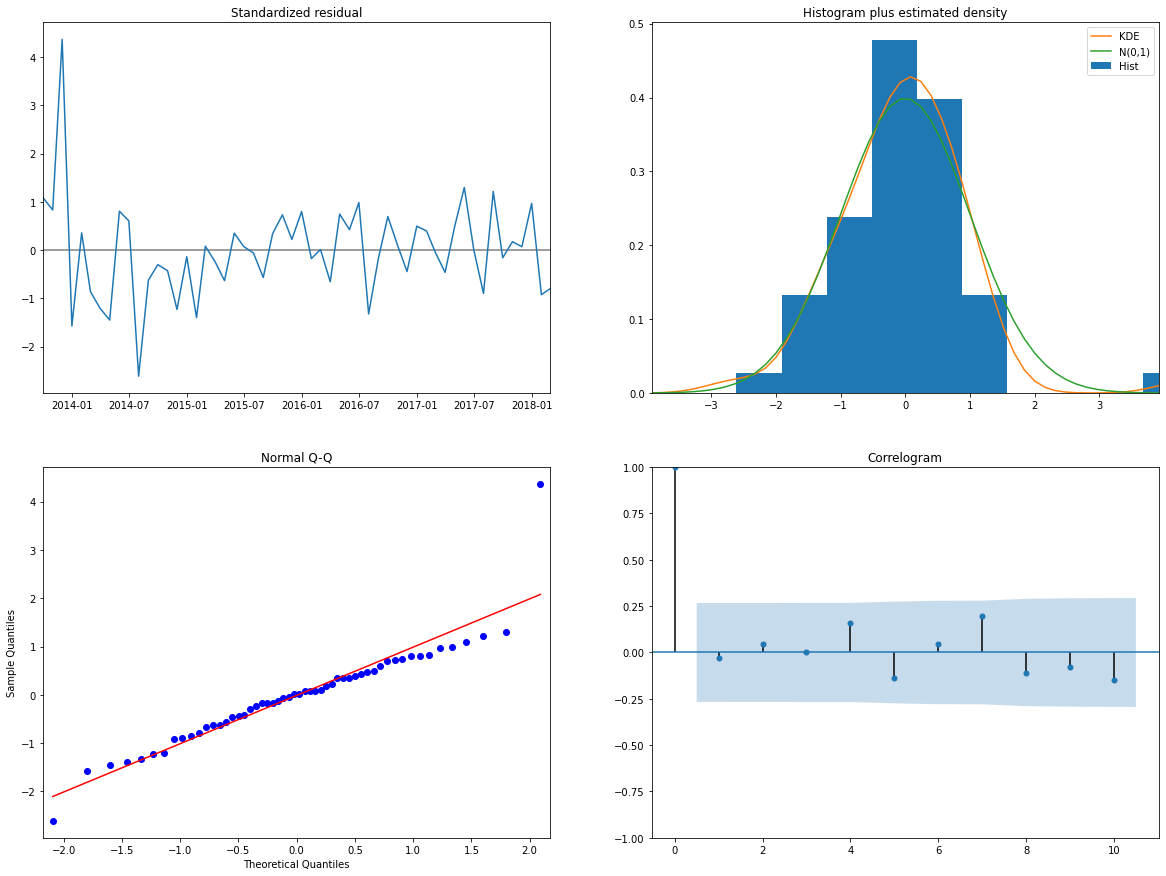

In [ ]:
best_model.plot_diagnostics(figsize=(20, 15))
plt.show()

Dickey–Fuller test:: p=0.073220


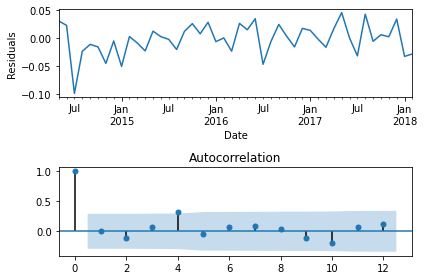

In [ ]:
# STL-decomposition
plt.subplot(211)
best_model.resid[13:].plot()
plt.ylabel(u'Residuals')
ax = plt.subplot(212)
#sm.graphics.tsa.plot_acf(best_model.resid[13:].values.squeeze(), lags=48, ax=ax)
plot_acf(best_model.resid[13:].values.squeeze(), lags=12, ax=ax)

print("Dickey–Fuller test:: p=%f" % adfuller(best_model.resid[13:])[1])

plt.tight_layout()

### Prediction

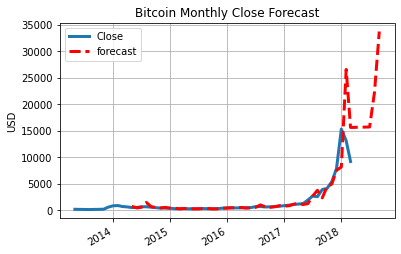

In [ ]:
# Prediction
btc_month_sarima = btc_month[['Close']]
date_list = [datetime(2018, 6, 30), datetime(2018, 7, 31), datetime(2018, 8, 31)]
future = pd.DataFrame(index=date_list, columns= btc_month.columns)
btc_month_sarima = pd.concat([btc_month_sarima, future])

btc_month_sarima['forecast'] = invboxcox(best_model.predict(start=12, end=75), lmbda)

btc_month_sarima.Close.plot(linewidth=3)
btc_month_sarima.forecast.plot(color='r', ls='--', label='forecast', linewidth=3)
plt.legend()
plt.title('Bitcoin Monthly Close Forecast')
plt.ylabel('USD')
plt.grid()
plt.savefig('bitcoin_monthly_forecast.png')

### Validation

In [ ]:
btc_month_predict = btc_month['2015-01-01':'2018-01-01']

# Get a naive forecast
close_history = [x for x in btc_month_predict['Close']]
predictions = list()
for i in range(len(btc_month_predict)):
    # predict
    predictions.append(close_history[-1])
    # update observation
    close_history.append(btc_month_predict.iloc[i]['Close'])
    
# Calculate RMSE
rmse = sqrt(mean_squared_error(btc_month_predict['Close'], predictions))
print('RMSE: %.2f' % rmse)

RMSE: 2853.23


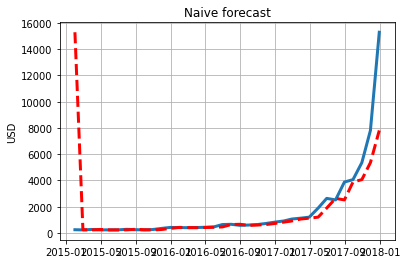

In [ ]:
# Plot predictions vs actual
btc_month_predict['naive_forecast'] = predictions
plt.plot(btc_month_predict['Close'],  linewidth=3)
plt.plot(btc_month_predict['naive_forecast'], color='r', ls='--', label='forecast', linewidth=3)
plt.title('Naive forecast')
plt.ylabel('USD')
plt.grid()

In [ ]:
y_forecasted = btc_month_sarima.forecast
y_truth = btc_month_sarima['2015-01-01':'2020-01-01'].Close

# Compute the root mean square error
rmse = np.sqrt(((y_forecasted - y_truth) ** 2).mean())
print('Mean Squared Error: {}'.format(round(rmse, 2)))

Mean Squared Error: 2710.09


Text(0, 0.5, 'USD')

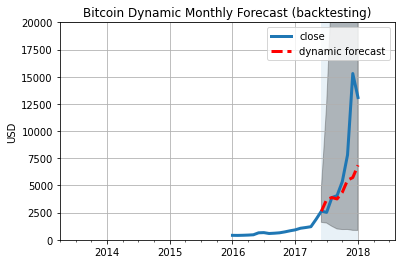

In [ ]:
t1 = pd.to_datetime('2017-06-30')
t2 = pd.to_datetime('2018-01-31')
btc_month_dynamic = best_model.get_prediction(start=t1, end=t2, dynamic=True, full_results=True)
btc_month_sarima['dynamic_forecast'] = invboxcox(btc_month_dynamic.predicted_mean, lmbda)

# Taking 80% confidence interval because the 95% blows out too high to visualise
pred_dynamic_ci = btc_month_dynamic.conf_int(alpha=0.2)
pred_dynamic_ci['lower close_box'] = invboxcox(pred_dynamic_ci['lower close_box'], lmbda)
pred_dynamic_ci['upper close_box'] = invboxcox(pred_dynamic_ci['upper close_box'], lmbda)

# Plot
plt.ylim((0,20000))

btc_month_sarima.Close['2016':'2018-01'].plot(label='close', linewidth=3)
btc_month_sarima.dynamic_forecast.plot(color='r', ls='--', label='dynamic forecast', linewidth=3)

plt.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)
plt.fill_betweenx(plt.ylim(), t1, t2, alpha=.1, zorder=-1)

plt.legend()
plt.title('Bitcoin Dynamic Monthly Forecast (backtesting)')
plt.grid()
plt.ylabel('USD')

Text(0, 0.5, 'USD')

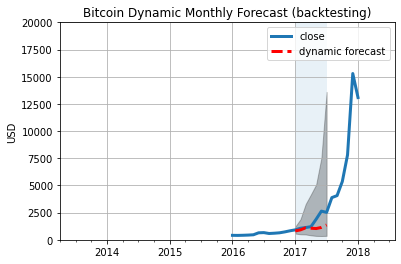

In [ ]:
# Get the dynamic forecast between dates t1 and t2
t1 = pd.to_datetime('2017-01-31')
t2 = pd.to_datetime('2017-07-31')
btc_month_dynamic = best_model.get_prediction(start=t1, end=t2, dynamic=True, full_results=True)
btc_month_sarima['dynamic_forecast'] = invboxcox(btc_month_dynamic.predicted_mean, lmbda)

# Taking 80% confidence interval because the 95% blows out too high to visualise
pred_dynamic_ci = btc_month_dynamic.conf_int(alpha=0.2)
pred_dynamic_ci['lower close_box'] = invboxcox(pred_dynamic_ci['lower close_box'], lmbda)
pred_dynamic_ci['upper close_box'] = invboxcox(pred_dynamic_ci['upper close_box'], lmbda)

# Plot
plt.ylim((0,20000))

btc_month_sarima.Close['2016':'2018-01'].plot(label='close', linewidth=3)
btc_month_sarima.dynamic_forecast.plot(color='r', ls='--', label='dynamic forecast', linewidth=3)

plt.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)
plt.fill_betweenx(plt.ylim(), t1, t2, alpha=.1, zorder=-1)

plt.legend()
plt.title('Bitcoin Dynamic Monthly Forecast (backtesting)')
plt.grid()
plt.ylabel('USD')

# LSTM

In [ ]:
# Import the dataset and encode the date
#dateparse = lambda dates: pd.datetime.strptime(dates, '%b %d, %Y')
for col in df.columns: 
    print(col) 

Open
High
Low
Close


In [ ]:
for col in df.columns: 
    print(col) 

Open
High
Low
Close


In [ ]:
df

,Open,High,Low,Close
Date,,,,
2013-04-28,135.30,135.98,132.10,134.21
2013-04-29,134.44,147.49,134.00,144.54
2013-04-30,144.00,146.93,134.05,139.00
2013-05-01,139.00,139.89,107.72,116.99
2013-05-02,116.38,125.60,92.28,105.21
...,...,...,...,...
2018-02-16,10135.70,10324.10,9824.82,10233.90
2018-02-17,10207.50,11139.50,10149.40,11112.70
2018-02-18,11123.40,11349.80,10326.00,10551.80


In [ ]:
df['Date'] = pd.to_datetime(df['Date']).dt.date
group = df.groupby('Date')
group

KeyError: 'Date'

In [ ]:
Real_Price = group['Close'].mean()
df_train= Real_Price[:len(Real_Price)-30]
df_test= Real_Price[len(Real_Price)-30:]
Real_Price

In [ ]:
df_train

In [ ]:
df_test

NameError: name 'df_test' is not defined

In [ ]:
#process data
training_set=df_train.values
training_set=np.reshape(training_set, (len(training_set), 1))
#df.head
training_set

NameError: name 'df_train' is not defined

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
training_set=sc.fit_transform(training_set)
X_train= training_set[0:len(training_set)-1]
y_train= training_set[1:len(training_set)]
X_train

In [ ]:
y_train

In [ ]:
X_train= np.reshape(X_train, (len(X_train), 1, 1))

In [ ]:
#importing the keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
# Initialising the RNN
regressor = Sequential()

# Adding the input layer and the LSTM layer
regressor.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNNregressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, batch_size = 5, epochs = 100)

In [ ]:
# Making the predictions
test_set = df_test.values
inputs = np.reshape(test_set, (len(test_set), 1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (len(inputs), 1, 1))
predicted_BTC_price = regressor.predict(inputs)
predicted_BTC_price = sc.inverse_transform(predicted_BTC_price)

In [ ]:
predicted_BTC_price

In [ ]:
df_test

In [ ]:
# Visualising the results
plt.figure(figsize=(25,15), dpi=100, facecolor='w', edgecolor='k')
ax = plt.gca()  
plt.plot(test_set, color = 'red', label = 'Real BTC Value')
plt.plot(predicted_BTC_price, color = 'blue', label = 'Predicted BTC Price')
plt.title('BTC Price Prediction', fontsize=20)
df_test = df_test.reset_index()
x=df_test.index
labels = df_test['Date']
plt.xticks(x, labels, rotation = 'vertical')
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(10)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(10)
plt.xlabel('Time', fontsize=10)
plt.ylabel('BTC Price(USD)', fontsize=20)
plt.legend(loc=2, prop={'size': 25})
plt.show()

In [ ]:
from math import sqrt
predicted_BTC_price = predicted_BTC_price.ravel() 
TM_MSE = np.mean((predicted_BTC_price - df_test['Close']) ** 2)
TM_RMSE = sqrt(TM_MSE)
TM_MSE, TM_RMSE